**Answer a)**

In [ ]:
# Mounting the Google Drive for accessing the Cleveland dataset
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importing the necessary package to read the dataset
import pandas as pd

# Reading the content of the dataset to a dataframe
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Files/processedClevelandData.csv", sep=";")



In [ ]:
mean = df.groupby('num')['trestbps'].mean().rename("Mean")    # Computing mean for resting blood pressure per target class
median = df.groupby('num')['trestbps'].median().rename("Median")    # Computing median for resting blood pressure per target class
sd = df.groupby('num')['trestbps'].std().rename("Standard Deviation")    # Computing standard dev for resting blood pressure per target class
pd.concat([mean, median, sd], axis=1)   # Displaying the mean, median, standard deviation for each target type in the form of a table


Mean  Median  Standard Deviation
num                                        
0    129.250000   130.0           16.204739
1    133.254545   130.0           18.027980
2    134.194444   133.0           17.896240
3    135.457143   130.0           21.660947
4    138.769231   145.0           17.186011

The above table shows for each type of the target class, the mean,median and standard deviation values. 

**Answer b)**

In [ ]:
# Importing relevant packages
from scipy.stats import skew 
import numpy as np  
import pylab as p  

k = df['num'].unique().tolist()   # Storing the unique target class values

# Printing the skewness values for all target classes
for i in k:
  x = df[df.num == i]['trestbps']
  print( '\nSkewness for num=' +str(i) +' is ' + str(skew(x)))


Skewness for num=0 is 0.4294127076197109

Skewness for num=2 is 0.6081548953297375

Skewness for num=1 is 0.845113293951586

Skewness for num=3 is 1.0883809327496508

Skewness for num=4 is -0.20376808797797888


The following are the observations:
1. All the resting blood pressure values are positively skewed for num=0,1,2,3 except for num=4 where it is negatively skewed.
2. For num=3, the skewness is the maximum.

num
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: trestbps, dtype: object

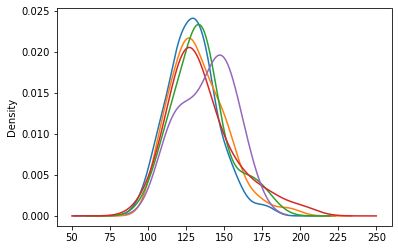

In [ ]:
# Plotting density plots of the resting blood pressure for different target classes
df.groupby('num')['trestbps'].plot.kde()


The skewness of the resting blood pressure is further illustrated by the above density plot for each target class

**Answer c)**

In [ ]:
# Important the relevant packages
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(data, method):
  """ Plots the heatmap with a particular correlation method

  This funtion is resposible for plotting the heatmaps of some selected features of the dataset
  by taking two paramenters, viz., the dataset features and the method of correlation

  Arg:
      The inputs are the dataset and the method of correlation
    
  Return:
      VOID - Does not return any value
    
  """

  # Computing the correlation matrix for the selected features
  corr_matrix_spearman = data.corr(method)

  f, ax = plt.subplots(figsize=(80,5))

  # Generating the heatmap from the correlation matrix
  heatmap = sns.heatmap(corr_matrix,
                        
                        square = True,
                        linewidths = .5,
                        cmap = 'copper',
                        cbar_kws = {'shrink': .4,
                                  'ticks' : [-1, -.5, 0, 0.5, 1]},
                        vmin = -1,
                        vmax = 1,
                        annot = True,
                        annot_kws = {"size": 15})


  ax.set_yticklabels(corr_matrix.columns, rotation = 0)
  ax.set_xticklabels(corr_matrix.columns)

  sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

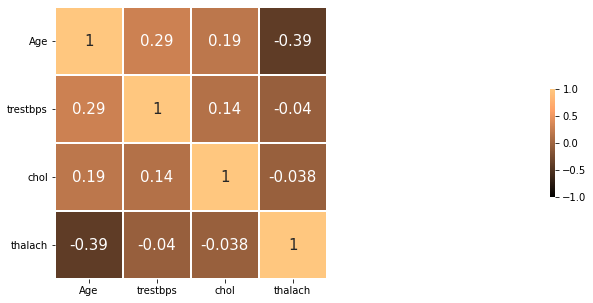

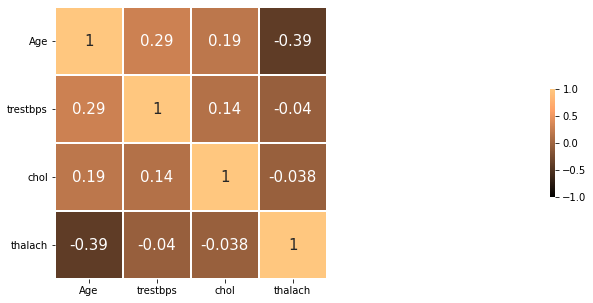

In [ ]:
# Calling the heatmap function with spearman's correlation 
plot_heatmap(df[['Age','trestbps','chol','thalach']], "spearman")

# Calling the heatmap function with kendall's correlation 
plot_heatmap(df[['Age','trestbps','chol','thalach']], "kendall")

The above annotated heatmap shows the correlation values among the four features namely age, resting blood pressure, serum cholesterol level and maximum heart rate achieved.

The following are the observations:
1. Age is more negatively correlated with the maximum hear rate achieved. However, the strength if it is 0.39 which is weak. 
2. Age is positively correlated with resting blood pressure. However, with a correlation coefficient of 0.29, it is also very weak.

# New Section